In [348]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model, model_selection, metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score

df = pd.read_csv("Amazon Items Cleaned.csv")
df

# import matplotlib.pyplot as plt
# %matplotlib inline  
# plt.rcParams['figure.figsize'] = (10, 6)

# lrm = linear_model.LogisticRegression()
# lrm.fit(df[["Stars"]],df["BestSeller"])
# df.plot.scatter(x='Stars',y='BestSeller',s=30)
# x = np.linspace(df['Stars'].min(),df['Stars'].max(),1000)
# y_pred_p=lrm.predict_proba(np.reshape(x, (-1, 1)))
# y_pred_p1=[y[1] for y in y_pred_p]
# plt.plot(x,y_pred_p1,color='Black')
# plt.plot(x,[0.5]*len(x),color="red")
# plt.show()

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3869.0,0,0,28.0,13.95,4.7
1,Amazfit Band 5 Activity Fitness Tracker with A...,Amazfit,21158.0,0,0,1000.0,29.88,4.1
2,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16242.0,0,1,277.0,14.44,4.6
3,"Amazon Glow with Tangram Bits | Learn, Play, R...",Amazon,215.0,0,1,31.0,329.98,4.4
4,"Echo Show 5 (2nd Gen, 2021 release) - Deep Sea...",Amazon,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...,...
1631,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
1632,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
1633,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
1634,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


# Split dataset into feature vector (X) and target value (Y) series

In [349]:
X = df
y = df["BestSeller"]
X.pop("BestSeller")
X.pop("Name")
X.pop("Brand")

X

,Rating,AmazonChoice,Comments,Price,Stars
0,3869.0,0,28.0,13.95,4.7
1,21158.0,0,1000.0,29.88,4.1
2,16242.0,1,277.0,14.44,4.6
3,215.0,1,31.0,329.98,4.4
4,928.0,1,21.0,114.98,4.7
...,...,...,...,...,...
1631,5999.0,0,4.0,25.00,4.9
1632,3950.0,0,15.0,100.00,4.9
1633,7520.0,0,12.0,10.00,4.9
1634,3014.0,0,3.0,30.00,4.9


In [350]:
# Function - Spliting the dataset into test and train
# test_size = default 0.25
# random_state = default np.random

def split_to_train_and_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    return X_train, X_test, y_train, y_test

# Splitting the data into train and test subsets

In [351]:
X_train, X_test, y_train, y_test = split_to_train_and_test(X,y)

In [352]:
# function - MinMax Scaler

def scale_features(X_train):
    scaler = MinMaxScaler(feature_range=(0, 1)) # StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    return X_train_scaled

# Linear Regression - Evaluation using r2_score

In [353]:
def train_1st_model(X_train, y_train):
    reg = LinearRegression(fit_intercept = True)
    reg.fit(X_train, y_train)
    return reg

def predict_1st(trained_1st_model, X_test):
    y_pred = trained_1st_model.predict(X_test)
    return y_pred

trained_model_1st = train_1st_model(X_train, y_train)
y_pred = predict_1st(trained_model_1st, X_test)

evaluatePer = metrics.r2_score(y_test, y_pred)
print(evaluatePer)

0.03806182328667784


# R2 value is very low, hence we will not use Linear Regression

# Scaling X_train

In [354]:
# X_train_scaled = scale_features(X_train)
# print(X_train_scaled)
# print("\n")
# print("Min Value: ", X_train_scaled.min(axis=0))
# print("Max Value: ", X_train_scaled.max(axis=0))

# Scaling X_test

In [355]:
# X_test_scaled = scale_features(X_test)
# print(X_test_scaled)
# print("\n")
# print("Min Value: ", X_test_scaled.min(axis=0))
# print("Max Value: ", X_test_scaled.max(axis=0))

# Linear Regression - Evaluation using r2_score

In [356]:
clf_model = LogisticRegression().fit(X_train, y_train)
clf_model
y_pred=clf_model.predict(X_test)

resDF = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF.to_csv("Amazon Predict.csv", index = None)
resDF

,Actual,Predicted
206,0,0
120,0,0
1297,0,0
719,0,0
614,0,0
...,...,...
896,0,0
668,0,0
1154,0,0
713,0,0


In [357]:
# Count number of predicted items

count = 0
for i in resDF["Predicted"] :
    if i == 1 :
        count = count + 1
print(count)

0


# We tried to predict if an item will be a Best Seller on amazon via logistic regression Because we thaught there was a connection between our data and the result we found out that we can't predict if an item will be a Best Seller using 
# supervised learning

In [358]:
df

,Rating,AmazonChoice,Comments,Price,Stars
0,3869.0,0,28.0,13.95,4.7
1,21158.0,0,1000.0,29.88,4.1
2,16242.0,1,277.0,14.44,4.6
3,215.0,1,31.0,329.98,4.4
4,928.0,1,21.0,114.98,4.7
...,...,...,...,...,...
1631,5999.0,0,4.0,25.00,4.9
1632,3950.0,0,15.0,100.00,4.9
1633,7520.0,0,12.0,10.00,4.9
1634,3014.0,0,3.0,30.00,4.9


# Let's run KNN to try to classify our best sellers within the items

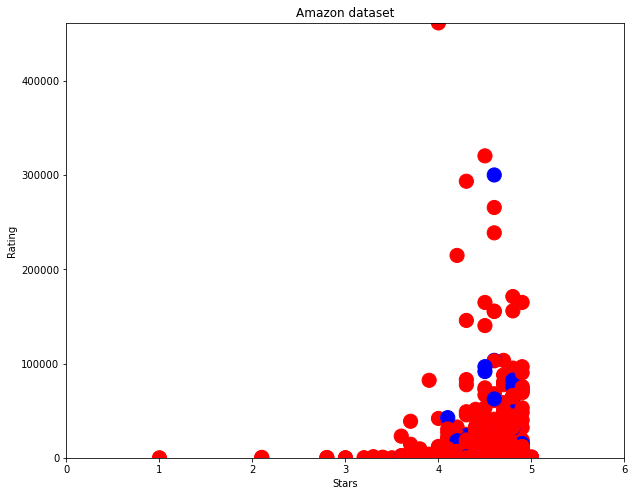

In [359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


X = X[['Stars', 'Rating']]
# y = y

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot data
plt.figure(figsize=(10, 8))
plt.scatter(X.Stars, X.Rating, c=y,  marker="o", cmap=cmap_bold, s=200)


x_min, x_max = X.Stars.min() - 1, X.Stars.max() + 1
y_min, y_max = X.Rating.min() - 1, X.Rating.max() + 1
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Amazon dataset')
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.show()


# the blue dots above uses as indicators for bestsellers.
# now let's train a classifier on the train set and try to asses it's performance by printing the confusion matrix, followed by the accuracy score.

In [360]:


# Split into training and test sets
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, random_state=1, test_size=0.2)

# set up the model, k-NN classification with k = ?
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(XTrain, yTrain)

y_pred = clf.predict(XTest)

print(metrics.confusion_matrix(y_true=yTest, y_pred=y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true=yTest, y_pred=y_pred))


[[317   2]
 [  9   0]]
Accuracy =  0.9664634146341463


# Running a test various values of k to check which value of k gives the best result and also if it's overfitting

In [361]:
k_s = []
train_accuracies = []
test_accuracies = []
for k in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(XTrain, yTrain)
    y_pred_train = clf.predict(XTrain)
    y_pred = clf.predict(XTest)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(
        y_true=yTrain, y_pred=y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true=yTest, y_pred=y_pred))

df = pd.DataFrame({"k": k_s, "train_accuracy": train_accuracies,
                  "test_accuracy": test_accuracies})
df


,k,train_accuracy,test_accuracy
0,1,0.999235,0.954268
1,2,0.971713,0.972561
2,3,0.972477,0.966463
3,4,0.971713,0.972561
4,5,0.971713,0.972561
5,6,0.971713,0.972561
6,7,0.971713,0.972561
7,8,0.971713,0.972561
8,9,0.971713,0.972561
9,10,0.971713,0.972561


# we found that the best k is k = 1 with accuracy score of 0.948171
# we will create the classification visualization for the knn classifier (based on the selected k). Any point in the red area will be classified as the red type, and any point in the green area will be classified as green.

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


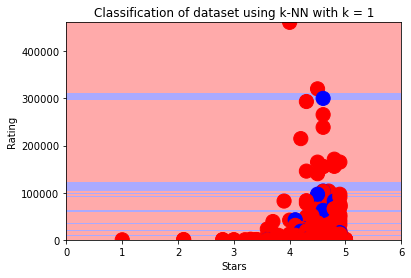

In [362]:
k = 1
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)

# plot classification
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap_light)

# plot data
plt.scatter(X.Stars, X.Rating, c=y, cmap=cmap_bold, s=200)

plt.title('Classification of dataset using k-NN with k = ' + str(k))
plt.xlabel('Stars')
plt.ylabel('Rating')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


# Cross validation to estimate the accuracy of a knn model on the dataset : splitting the data, fitting a model and computing the score 10 consecutive times (with different splits each time)

In [363]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=10)

scores


array([0.9695122 , 0.9695122 , 0.9695122 , 0.9695122 , 0.9695122 ,
       0.9695122 , 0.97546012, 0.97546012, 0.97546012, 0.97546012])

In [364]:

print("Overall accuracy: %0.2f" % scores.mean())


Overall accuracy: 0.97


In [365]:
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(clf, X, y, cv=10)
scores_list=[cross_val_score(clf, X, y, cv=flds).mean() for flds in range(3,26)]
print("highest result with X-fold, x=",np.argmax(scores_list)+3)

highest result with X-fold, x= 25


GridSearchCV
use the scoring parameter in order to define which evaluation score to optimize

In [366]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_neighbors': range(1, 25, 2)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring=make_scorer(
    metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:", clf.best_params_,
      " and its score was", clf.best_score_)

#if you want to see all iterations internal numbers uncomment the next line
#print(clf.cv_results_.items())


best parameter set is: {'n_neighbors': 5}  and its score was 0.9717147787429441
